# K-means clustering

## José Benjamín Ortiz Badillo A01277673

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Import the packages that we will be using
from sklearn.datasets import load_iris
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()


# Importing data

In [3]:
# Define the col names for the iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species as a column for easier grouping
df['Class'] = iris.target_names[iris.target]


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
#Printing the first 5 rows
print(df['Class'].head(60))


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
30        setosa
31        setosa
32        setosa
33        setosa
34        setosa
35        setosa
36        setosa
37        setosa
38        setosa
39        setosa
40        setosa
41        setosa
42        setosa
43        setosa
44        setosa
45        setosa
46        setosa
47        setosa
48        setosa
49        setosa
50    versicolor
51    versicolor
52    versicolor
53    versicolor
54    versicolor
55    versicolor
56    versicolor
57    versicolor
58    versicol

2. Drop rows with any missing values


In [5]:
#There's no missing values
if df.isnull().sum().sum() == 0:
    print("There are no missing values")


There are no missing values


3. Encoding the class label categorical column: from string to num


In [6]:
# Encoding the categorical column

# Initialize the OrdinalEncoder
oe = OrdinalEncoder(categories=[['setosa', 'virginica', 'versicolor']])

# Fit and transform the data
df['ClassEncoded'] = oe.fit_transform(df[['Class']])
df['ClassEncoded'] = df['ClassEncoded'].astype(int)

df.drop(['Class'], axis=1, inplace=True)
print(df)

#Visualize the dataset


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     ClassEncoded  
0      

Now the label/category is numeric


4. Discard columns that won't be used


In [7]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# Visualize the dataset


5. Scatter plot of the data

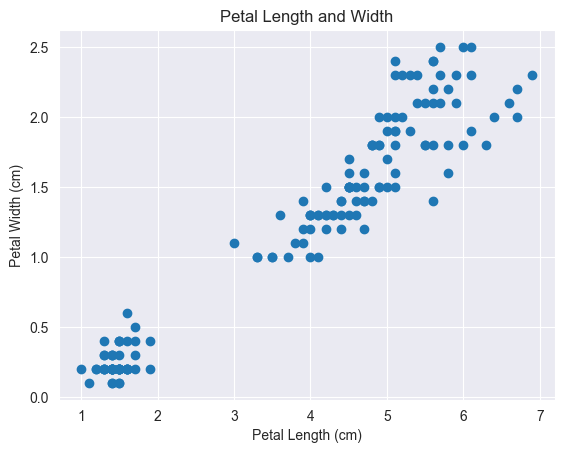

In [8]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.title("Petal Length and Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

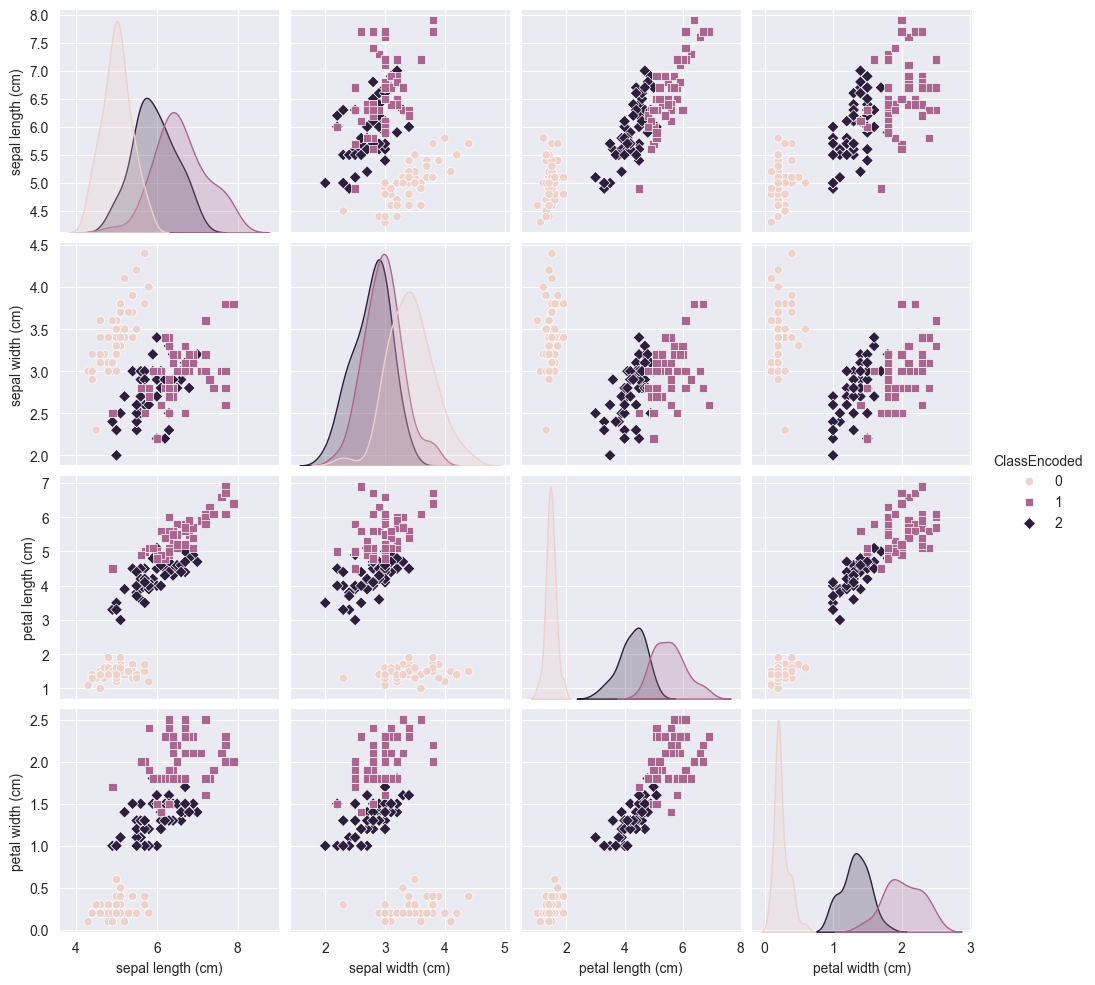

In [9]:
# Get dataframes for each real cluster
sns.pairplot(df, hue='ClassEncoded', markers=["o", "s", "D"])
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

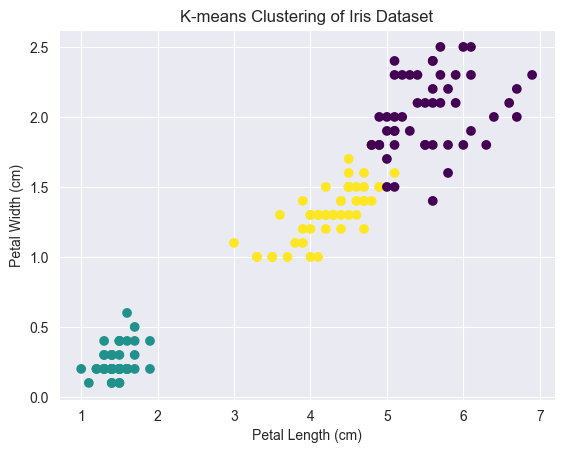

In [10]:
# Import sklearn KMeans
from sklearn.cluster import KMeans 
# Define number of clusters
nClusters = 3
# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=nClusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
# Print estimated cluster of each point in the dataset

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title("K-means Clustering of Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

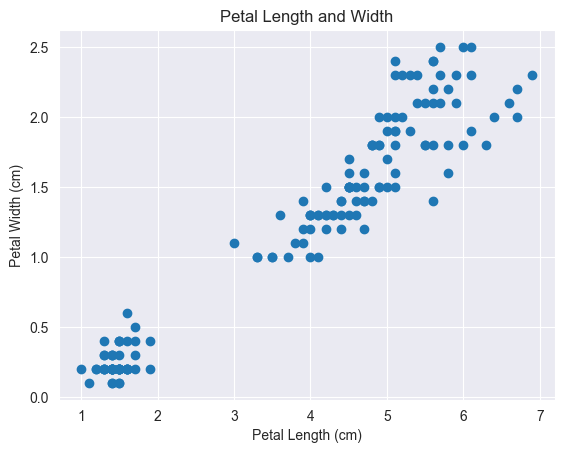

In [11]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.title("Petal Length and Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [12]:
# Laber of the estimated clusters
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   ClassEncoded  Cluster  
0             0        1  
1             0        1  
2             0        1  
3             0       

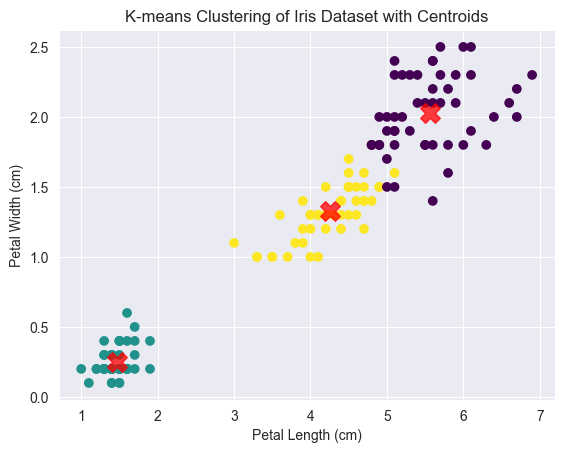

In [13]:
# Cluster centroides
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')
#Now we add the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-means Clustering of Iris Dataset with Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [14]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_

print("The Sum of Squared Error:", sse)

The Sum of Squared Error: 87.2646


In [15]:
# The number of iterations required to converge
noIter = kmeans.n_iter_

print("The Number of Iterations:", noIter)

The Number of Iterations: 6


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

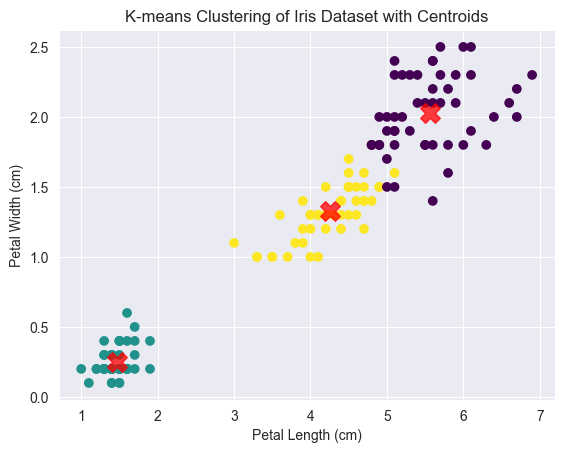

In [16]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')
#Now we add the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-means Clustering of Iris Dataset with Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

## Plot both real and estimated clusters to check for errors

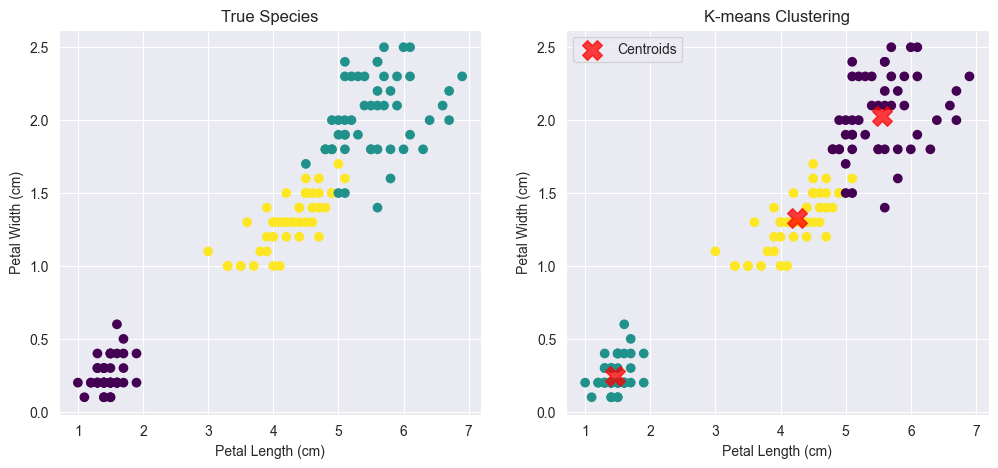

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['ClassEncoded'], cmap='viridis', marker='o')
plt.title("True Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Plot the K-means clusters
plt.subplot(1, 2, 2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()

plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [18]:
# Intialize a list to hold sum of squared error (sse)
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
X = iris.data

kF = KFold(n_splits=5,shuffle=True, random_state=42)
silhouetteScore = []

# Define values of k
for train_index, test_index in kF.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
    # Fit K-means on the training data
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)
    
    # Predict clusters on the test data
    clusters = kmeans.predict(X_test)
    
    # Calculate silhouette score
    score = silhouette_score(X_test, clusters)
    silhouetteScore.append(score)

average_score = sum(silhouetteScore) / len(silhouetteScore)
print("Average Silhouette Score:", average_score)


Average Silhouette Score: 0.5572223220820387


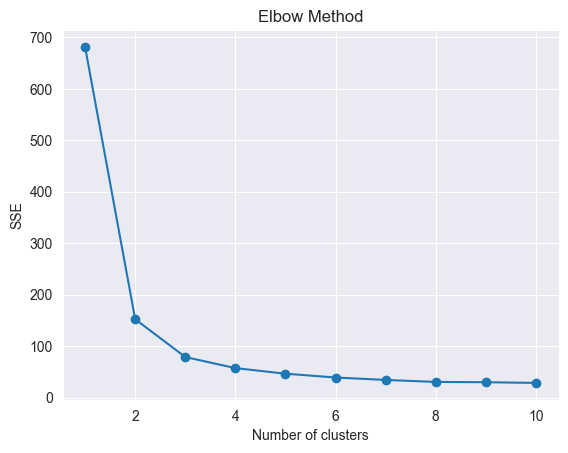

In [19]:
# Plot sse versus k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



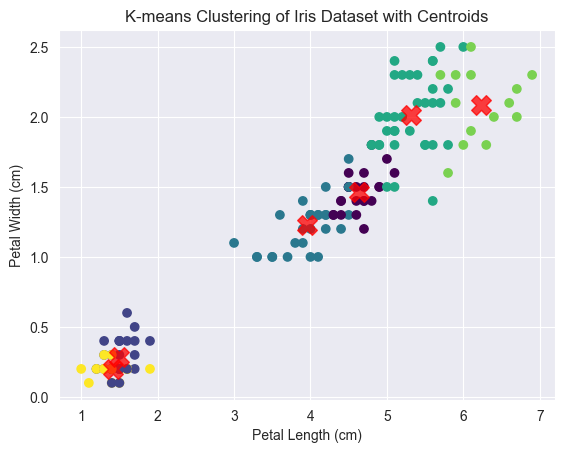

The SSE is: 42.87479277244495
The number of iterations: 8


In [34]:
# The optimal number of clusters could be 6
# Plotting with 6 clusters
df.drop(['Cluster'], axis=1, inplace=True)
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')

#Now we add the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-means Clustering of Iris Dataset with Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

print("The SSE is:", kmeans.inertia_)
print("The number of iterations:", kmeans.n_iter_)



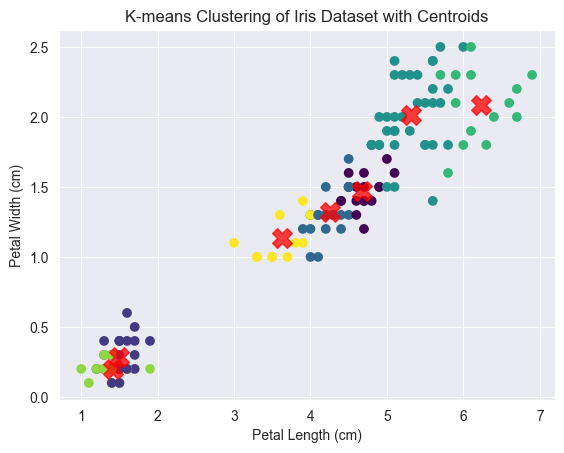

The SSE is: 38.95532775119618
The number of iterations: 8


In [32]:
# Plotting with 7 clusters
df.drop(['Cluster'], axis=1, inplace=True)
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')

#Now we add the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-means Clustering of Iris Dataset with Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

print("The SSE is:", kmeans.inertia_)
print("The number of iterations:", kmeans.n_iter_)

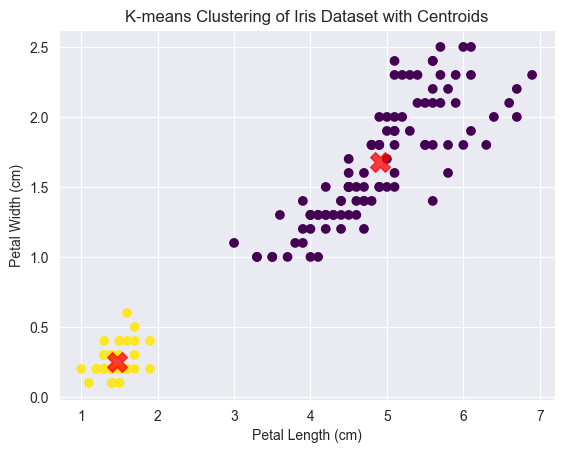

The SSE is: 179.94699999999997
The number of iterations: 2


In [33]:
# Plotting with 2 clusters
df.drop(['Cluster'], axis=1, inplace=True)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o')

#Now we add the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-means Clustering of Iris Dataset with Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

print("The SSE is:", kmeans.inertia_)
print("The number of iterations:", kmeans.n_iter_)


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

# Conclusion

## The optimal number of clusters in this example would be #7

That's because the SSE when doing this for 7 clusters is lower than when is done with 6, in addition the number of iterations remains the same, meaning the difference of processing is not that different.